core           INFO 	Loading data for Spanish Grand Prix - Practice 1 [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 11: Position data is incomplete!
api         WARNING 	Driver 23: Position data is incomplete!
api         WARNING 	Driver 24: Position data is incomplete!
api         WARNING 	Driver 36: Position data is incomplete!
api         WARNING 	Driver 45: Position data is incomplete!
api         WARNING 	Driver 88: Position data is incomplete!
api            INFO 	Fetching weather data...

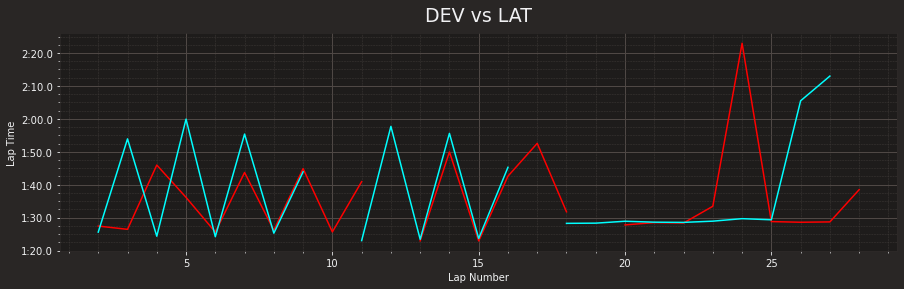

In [38]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

race = fastf1.get_session(2022, 'Spanish Grand Prix', 'FP1')
race.load()

dev = race.laps.pick_driver('DEV')
lat = race.laps.pick_driver('LAT')

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(dev['LapNumber'], dev['LapTime'], color='red')
ax.plot(lat['LapNumber'], lat['LapTime'], color='cyan')
ax.set_title("DEV vs LAT")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.show()

In [ ]:
### The above chart shows the lap times of De Vries and Latifi throughout the hour-long session. I have removed laps
### that I have assumed are out laps (laps out of the pit lane) or in laps (laps going back into the pit lane) as
### very little comparable data would be seen here.

### What you see if it takes De Vries a few laps (about 6) to become confident enough to put in competitive laps and 
### in his first stint he is slower than Latifi. However, in his second stint, De Vries actually goes quicker. It is
### a very fine margin, yes, but this is de Vries's first laps in a car that Latifi has driven all season

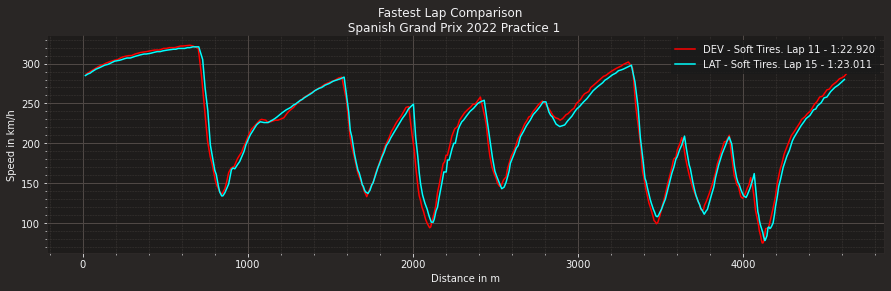

In [28]:
dev_lap = session.laps.pick_driver('DEV').pick_fastest()
lat_lap = session.laps.pick_driver('LAT').pick_fastest()

lat_tel = lat_lap.get_car_data().add_distance()
dev_tel = dev_lap.get_car_data().add_distance()

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(dev_tel['Distance'], dev_tel['Speed'], color='red', label='DEV - Soft Tires. Lap 11 - 1:22.920')
ax.plot(lat_tel['Distance'], lat_tel['Speed'], color='cyan', label='LAT - Soft Tires. Lap 15 - 1:23.011')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Practice 1")

plt.show()

In [ ]:
### The above chart is the Telemetry data of both De Vries fastest lap (Lap 11) and Latifi's fastest lap (Lap 15)
### What is is showing us is the difference in strategies that both drivers are running.

### De Vries: Braking into slower speed corners earlier & focusing on getting a good exit that allows him to get on
### the throttle quicker

### Latifi: Braking later into slow speed corners & focusing on carrying as much speed as possible through the corner

### Both strategies have their pros and cons. Drivers that try to brake as late as possible and force their cars
### through the corner tend to lose lap time. Maintaining as much speed through a corner as possible could generate
### understeer when the driver hits the apex of the corner, which sees them back on the throttle later, causing them
### to lose out on lap time.

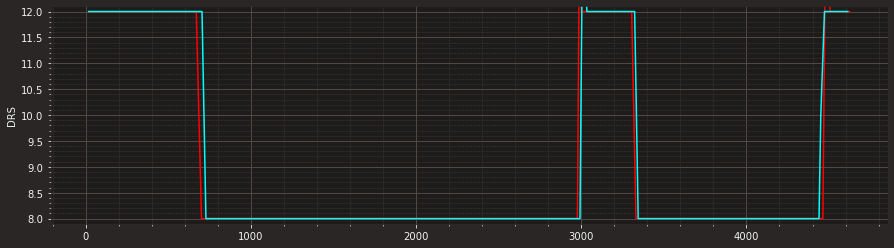

In [36]:
dev_drs = session.laps.pick_driver('DEV').pick_fastest()
lat_drs = session.laps.pick_driver('LAT').pick_fastest()

lat_tel_drs = lat_drs.get_car_data().add_distance()
dev_tel_drs = dev_drs.get_car_data().add_distance()

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(dev_tel_drs['Distance'], dev_tel_drs['DRS'], color='red', label='DEV - DRS')
ax.plot(lat_tel_drs['Distance'], lat_tel_drs['DRS'], color='cyan', label='LAT - DRS')

ax.set_ylabel('DRS')
plt.ylim(7.9,12.1)

plt.show()

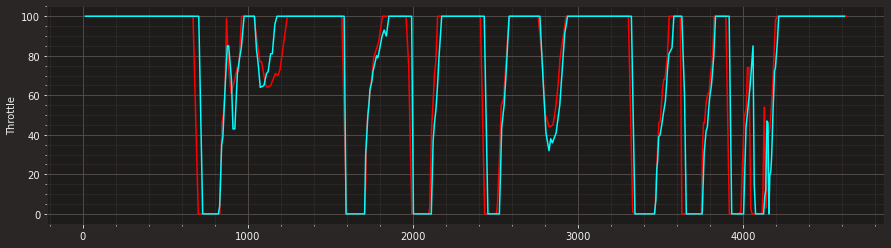

In [32]:
dev_drs = session.laps.pick_driver('DEV').pick_fastest()
lat_drs = session.laps.pick_driver('LAT').pick_fastest()

lat_tel_throttle = lat_drs.get_car_data().add_distance()
dev_tel_throttle = dev_lap.get_car_data().add_distance()

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(dev_tel_throttle['Distance'], dev_tel_throttle['Throttle'], color='red', label='DEV - Throttle')
ax.plot(lat_tel_throttle['Distance'], lat_tel_throttle['Throttle'], color='cyan', label='LAT - DRS')

ax.set_ylabel('Throttle')

plt.show()

In [ ]:
### With my comments about driving style with the Telemetry data, the throttle data backs me up. If you look at the
### data through turn 1, you can see that Latifi is on the throttle much later than De Vries is. This, again, is
### because Latifi is trying to carry as much speed into the corner as possible, which is causing him to get back on
### the throttle significantly later than De Vries